# Image Processing

> With the advent of sophisticated and affordable cameras and microcomputers, image processing is considered cost-effective, accurate, labor-saving, and reproducible.
 – Basic Principles of Image Processing, 
by Wells, Rainer, and Memoli (1992)

In this lab, we will look at various methods to import, process, and save image data.

## Loading images.

Please ensure that your current working directory contains the `images` folder, with all our source data in it. If not, please change your working directory (remember, in R this can be done using `getwd()` to get the current working directory and `setwd()` to change it to a different one).

In [1]:
getwd() 
# setwd("/path/to/right/folder")

[1] "C:/Users/Tommy/OneDrive/Documents/UC/22sem2/DATA201/lab6/Image Processing Lab"

As always, we are going to use the tidyverse framework.

In [2]:
library(tidyverse)
library(magrittr)
library(purrr)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: 'magrittr'


The following object is masked from 'package:purrr':

    set_names


The following object is masked from 'package:tidyr':

    extract




## magick package

And we are going to introduce the library `magick`, which is an R wrapper for the open source commandline program [ImageMagick](https://www.imagemagick.org/script/index.php).

In [4]:
install.packages("magick")

library(magick)

Installing package into 'C:/Users/Tommy/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)

also installing the dependency 'Rcpp'




package 'Rcpp' successfully unpacked and MD5 sums checked
package 'magick' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Tommy\AppData\Local\Temp\RtmpQJG64p\downloaded_packages


Linking to ImageMagick 6.9.12.3
Enabled features: cairo, freetype, fftw, ghostscript, heic, lcms, pango, raw, rsvg, webp
Disabled features: fontconfig, x11



We are going to work with a variety of different images. Some of them are `.jpg`, other are `.png`. Here we copy the names by hand, so to have some sort of "index" of what they are.

Note that the variable **base_path** is where all the image files are located.

In [6]:
base_path <- "./images/" # in this case all the images are within the "images" folder

colored_images   <- c("sign10.jpg",
                    "sign11.jpg",
                    "sign15.jpg")

gray_image       <- c("digits.png")

forest_image     <- c("forest.jpg")

skin_lesion      <- c("ISIC_0000000.png")

skin_lesion_mask <- c("ISIC_0000000_mask.png")

### Read in an image

To read an image, the library `magick` provides us a very flexible function. `image_read()` can read most image formats, and we don't need to specify the format before hand. Let's try that with the first of the colored images.

In [7]:
img <- image_read(path = paste0(base_path,colored_images[1]))

So, what is `img`?

In [8]:
img %>% class()

[1] "magick-image"

That is an ad hoc format from `magick`. We can see the `img` just by executing it.

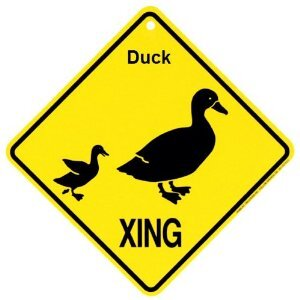

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 JPEG     300    300 sRGB       FALSE    15840 72x72  

In [9]:
img

Notice that the output also contain some useful information: the format of the image, its size (width and height), the colorspace (that is, how colors are encoded), whether there is a "matte", the size of the file in memory, and its density.

Using `purrr:map()` is easy to create a list with all the colored images.

In [10]:
col_images <- map(colored_images,
                      ~ .x %>%
                      paste0(base_path,.) %>%
                      image_read())

In [11]:
vect <- 1:10
vect
  map(vect,~.x %>% rnorm(2, .))

[1]  1  2  3  4  5  6  7  8  9 10

[[1]]
[1] 0.7272443 0.4314801

[[2]]
[1] 2.643826 1.887429

[[3]]
[1] 3.227158 4.177970

[[4]]
[1] 4.349490 4.330832

[[5]]
[1] 4.292536 5.224779

[[6]]
[1] 6.845969 4.657564

[[7]]
[1] 7.479039 8.169935

[[8]]
[1] 5.997101 7.207452

[[9]]
[1] 7.947076 8.975760

[[10]]
[1] 11.58173 10.21935

Your turn: read in the other images and give them some name.

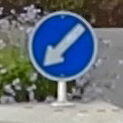

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 JPEG     123    123 sRGB       FALSE    19822 72x72  

In [15]:
myphoto<- image_read(path = paste0(base_path, colored_images[3]))
myphoto

## Processing images

In the following part we are goin to apply some common progessing algorithm to the images.

#### Rotating

We may want to rotate an image by some angle. For example, 45 degrees:

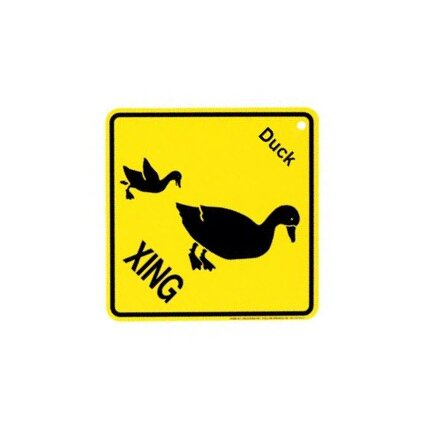

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 JPEG     426    426 sRGB       FALSE        0 72x72  

In [19]:
col_images %>%
  .[[1]] %>%
  image_rotate(45)

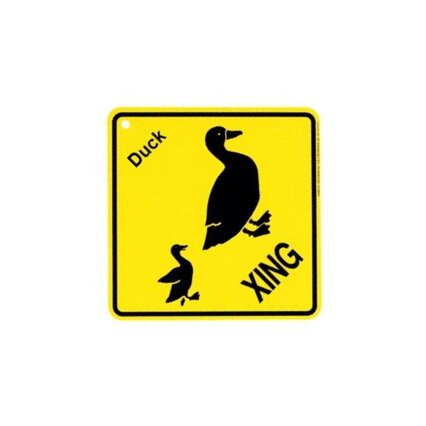

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 JPEG     426    426 sRGB       FALSE        0 72x72  

In [20]:
col_images[[1]] %>%
  image_rotate(-45)

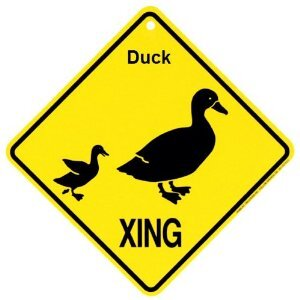

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 JPEG     300    300 sRGB       FALSE    15840 72x72  

In [25]:
col_images[[1]] 

Your turn: write the code to rotate the image by 45 degress in the other direction.

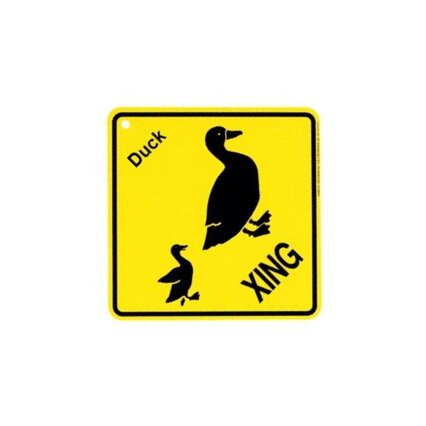

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 JPEG     426    426 sRGB       FALSE        0 72x72  

In [27]:
# your code goes here
col_images[[1]] %>%
  image_rotate(-45)

Using `purrr`, we can apply the same processing to all the images in the list. If we only want to print the result to screen (e.g., because we are looking for the perfect rotation angle) we can use `walk` instead of `map`.

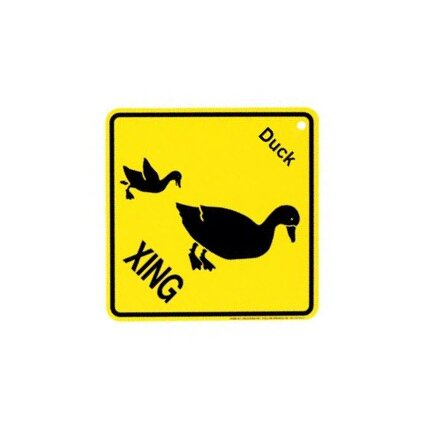

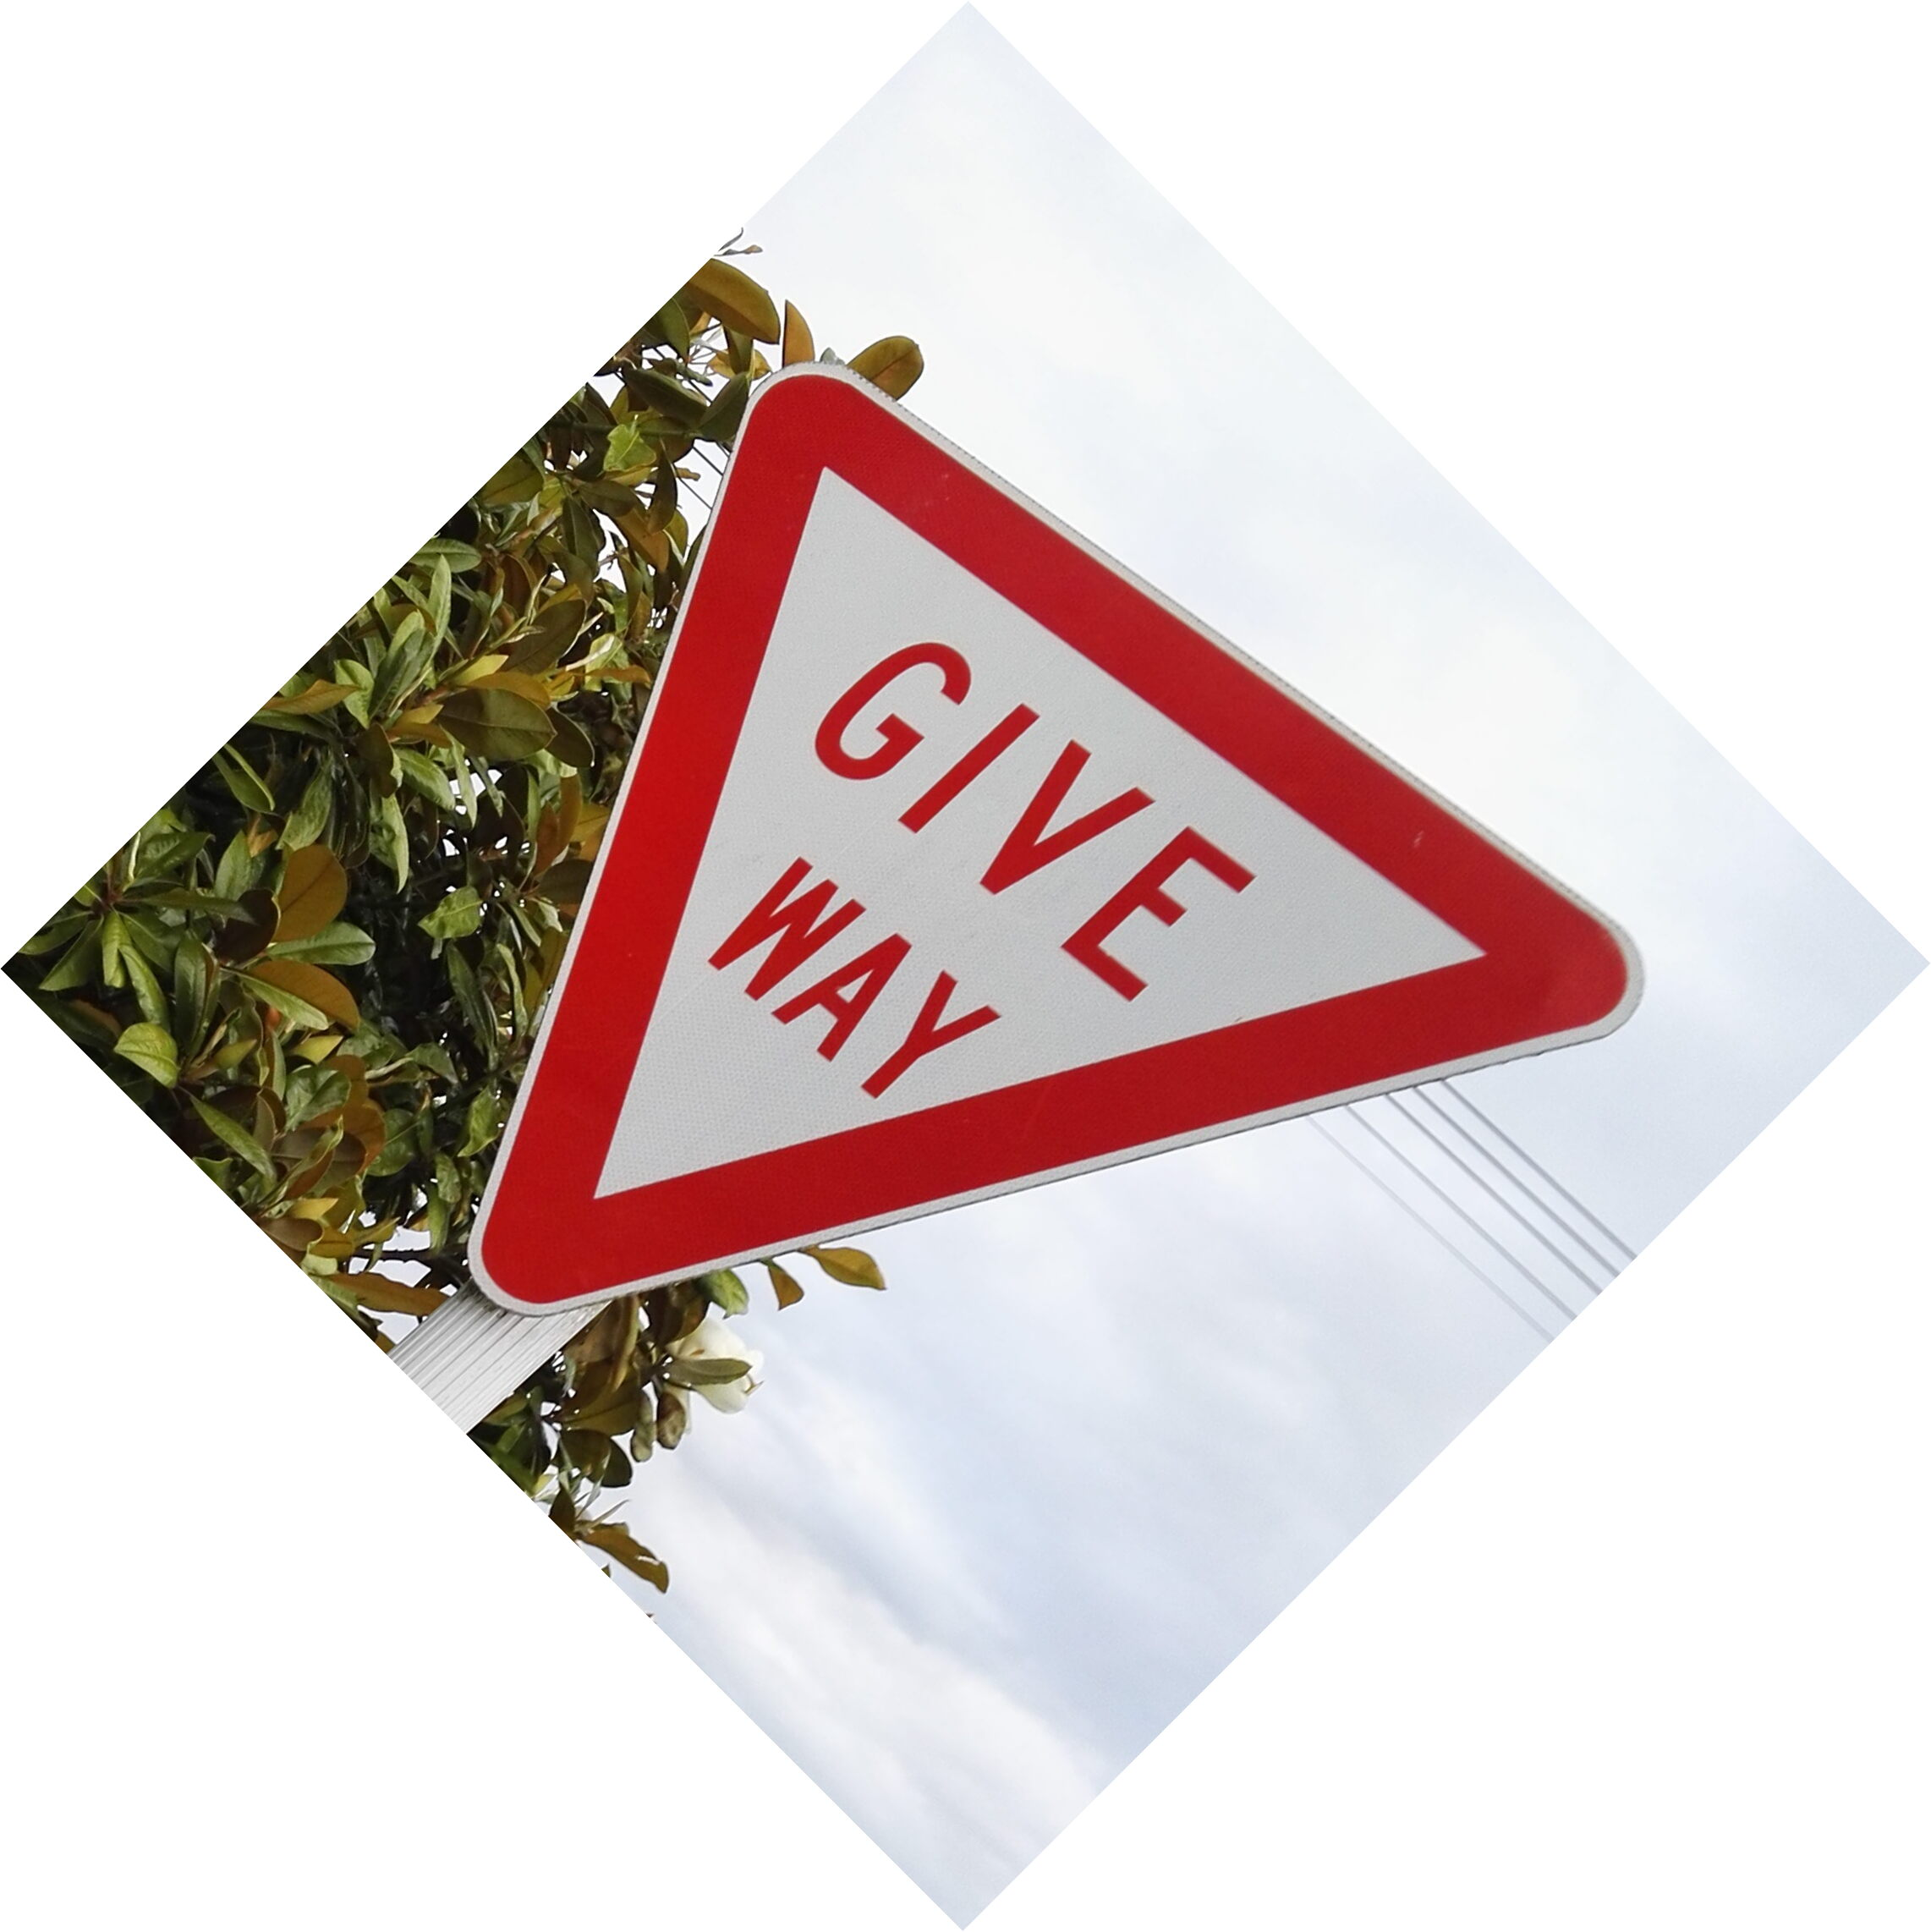

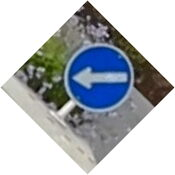

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 JPEG     426    426 sRGB       FALSE        0 72x72  
# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 JPEG    2283   2284 sRGB       FALSE        0 72x72  
# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 JPEG     175    175 sRGB       FALSE        0 72x72  


In [33]:
col_images %>%
  walk(~ .x %>% image_rotate(45) %>% print)

If we want to save them to a new list, we use `map` as usual.

In [34]:
rot_images <- col_images %>%
  map(~ .x %>% image_rotate(45))

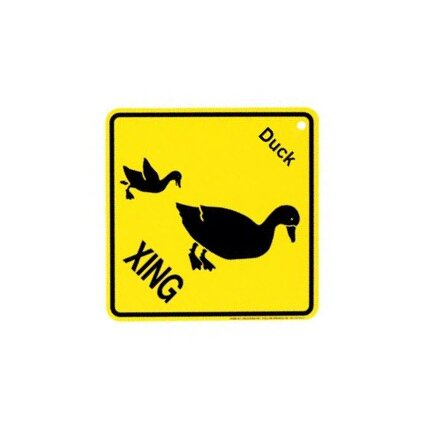

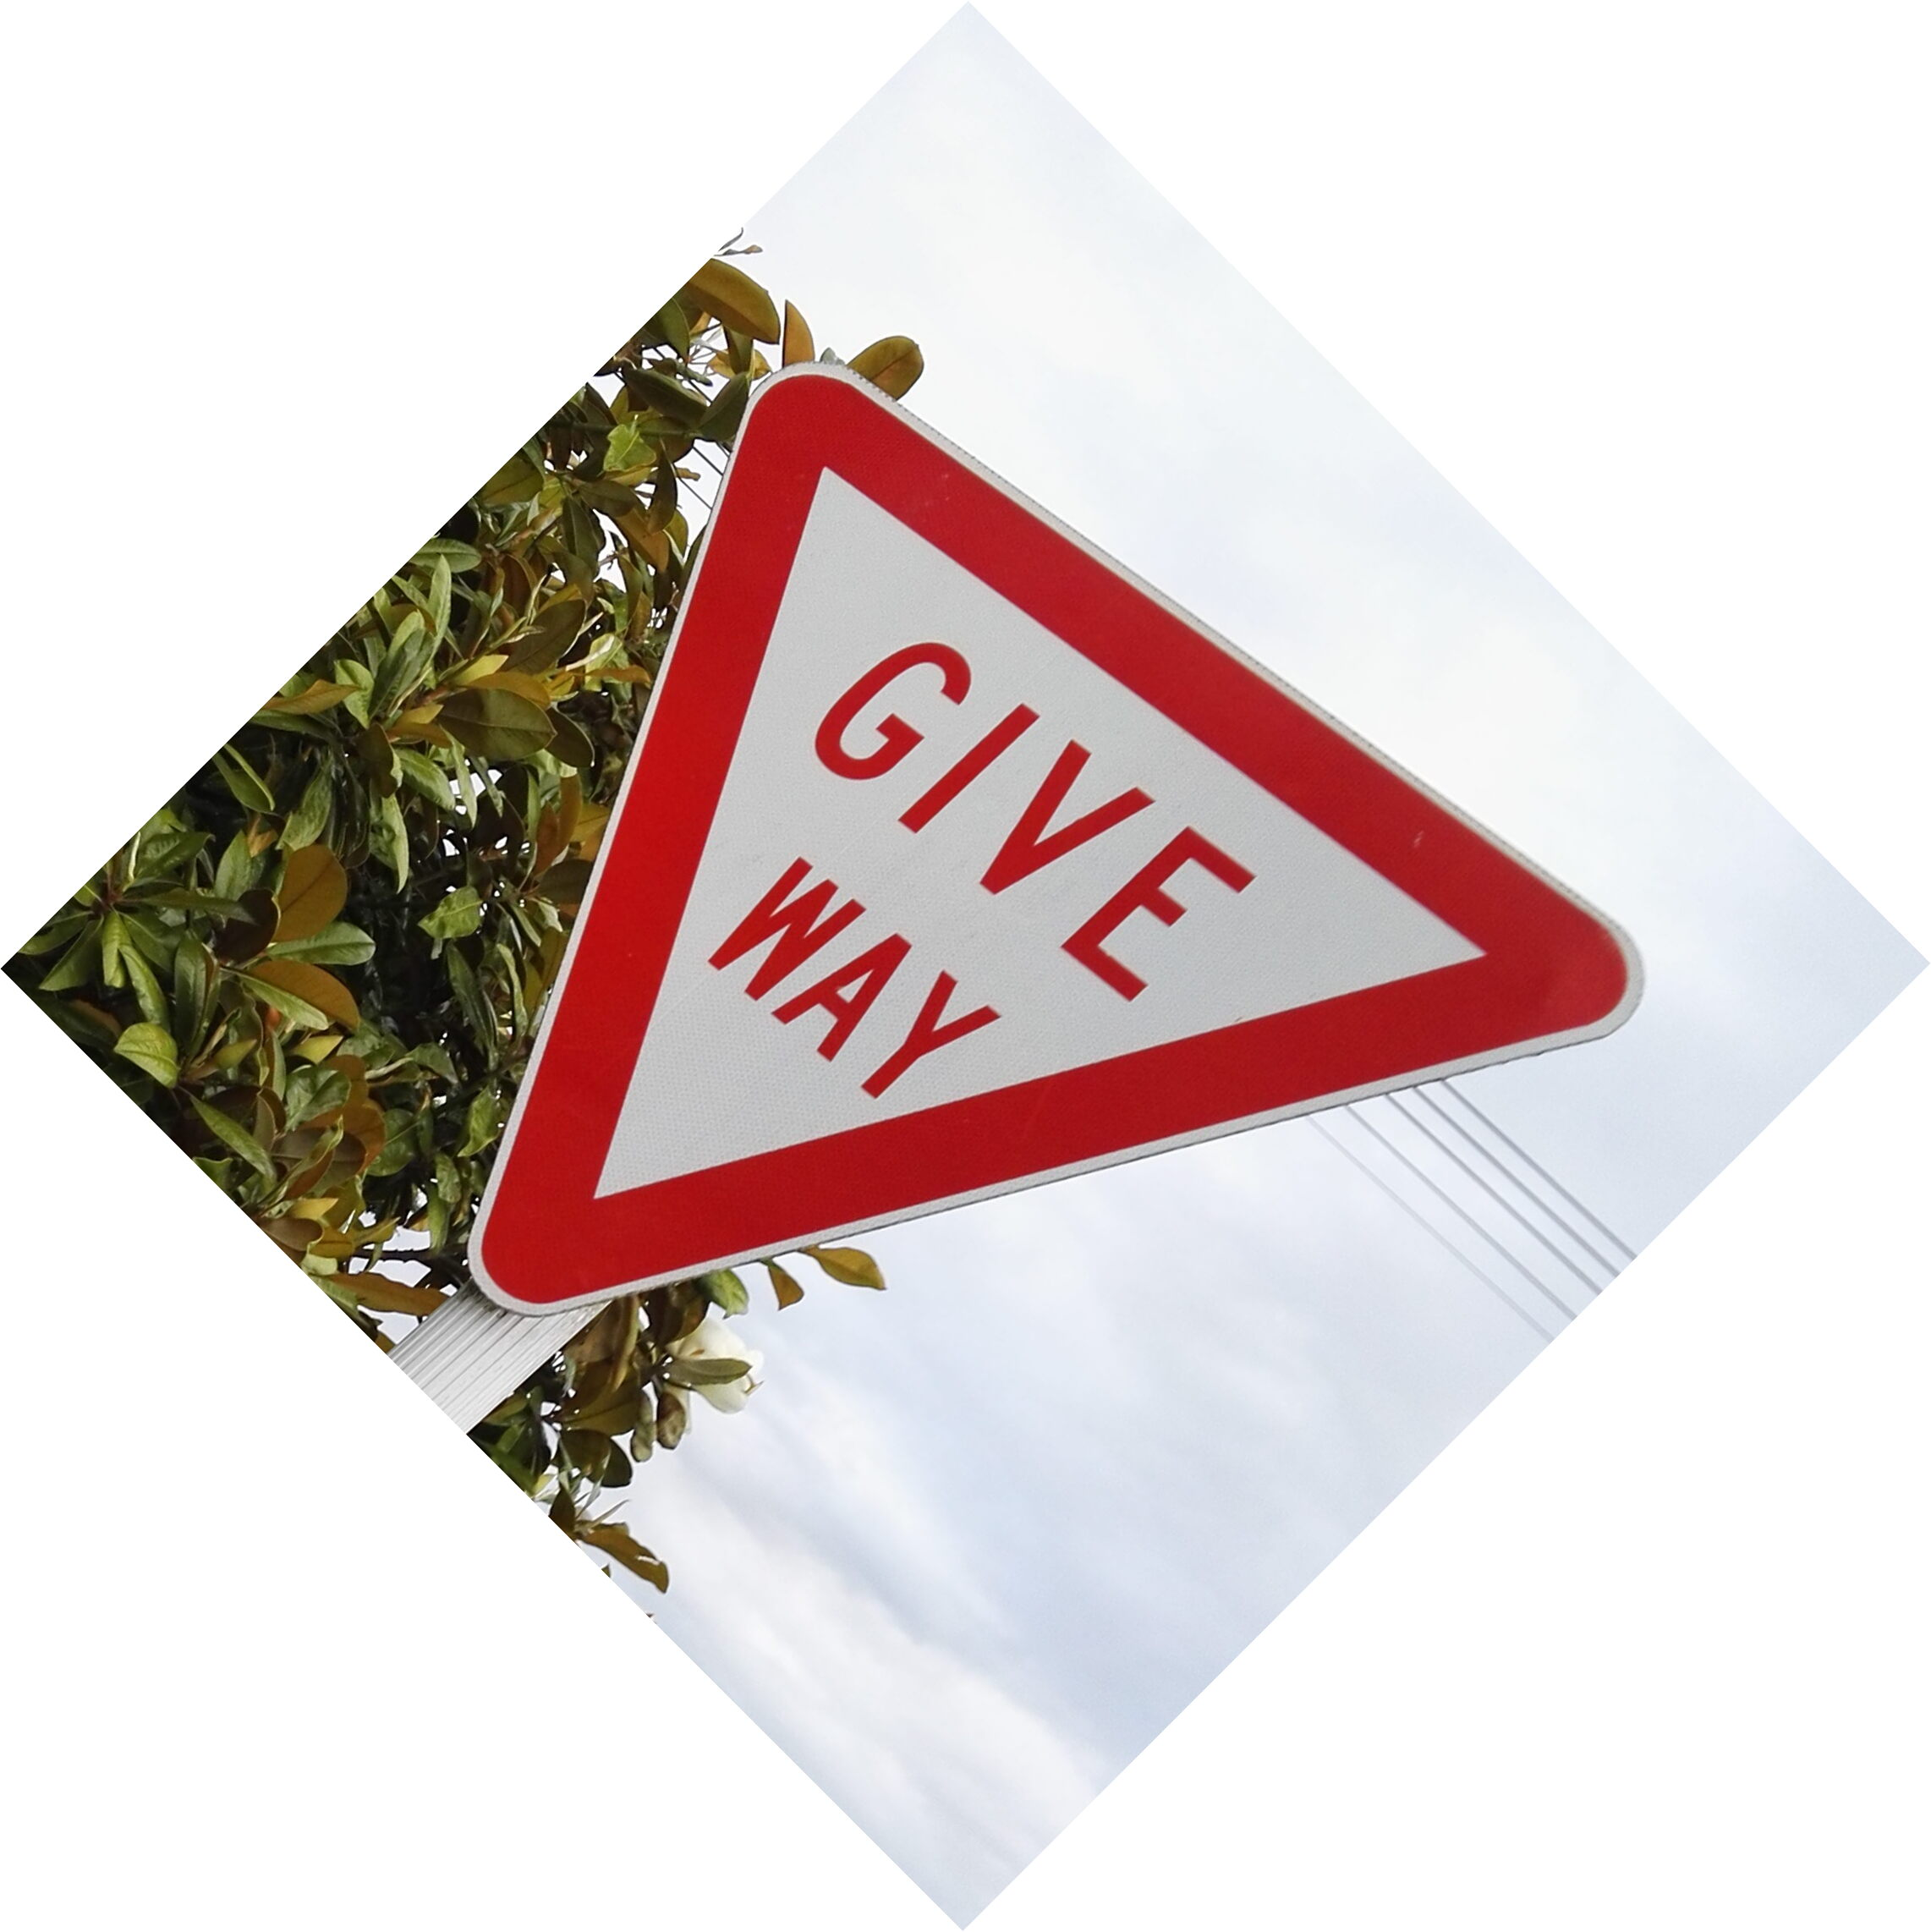

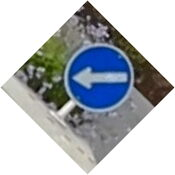

[[1]]
# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 JPEG     426    426 sRGB       FALSE        0 72x72  

[[2]]
# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 JPEG    2283   2284 sRGB       FALSE        0 72x72  

[[3]]
# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 JPEG     175    175 sRGB       FALSE        0 72x72  


In [35]:
rot_images

We can flip the image upside down (that is, reflect the image through a horizontal line in its center):

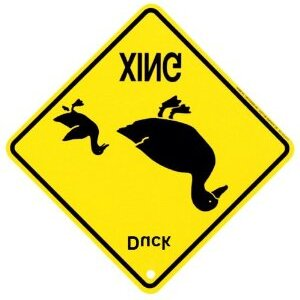

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 JPEG     300    300 sRGB       FALSE        0 72x72  

In [36]:
col_images %>%
 .[[1]] %>%
  image_flip()

Flop reflects the image through a vertical line:

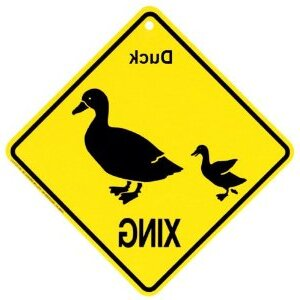

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 JPEG     300    300 sRGB       FALSE        0 72x72  

In [37]:
col_images %>%
 .[[1]] %>%
  image_flop()

Your turn: write the code to flip and then flop the same image.

Can you obtain the final output (the flip-flopped image) using a rotation?

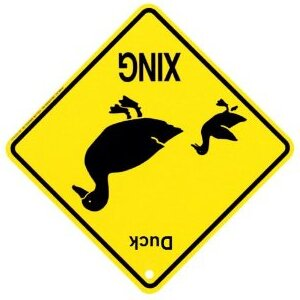

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 JPEG     300    300 sRGB       FALSE        0 72x72  

In [38]:
# your code goes here
col_images %>%
 .[[1]] %>%
  image_flip() %>%
 image_flop()

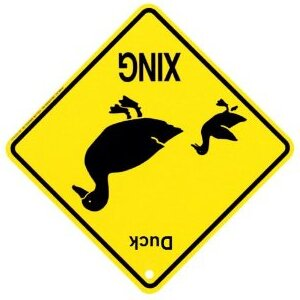

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 JPEG     300    300 sRGB       FALSE        0 72x72  

In [39]:
col_images %>%
 .[[1]] %>%
 image_rotate(180)

Other algorithms change what we see. For example, we can add some blur:

We are taking a blurring radius of 5 pixels, and a blurring standard deviation of 2 pixels. This is blurring by a truncated (to 5 pixels) normal distribution convolution kernel (with standard deviation of 2 pixels). 

**Try different values** to see how the blurring changes.

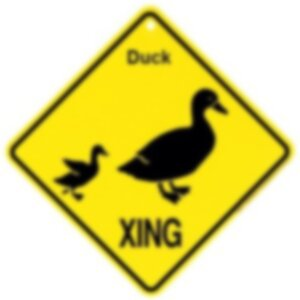

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 JPEG     300    300 sRGB       FALSE        0 72x72  

In [40]:
# Add blur
col_images %>%
 .[[1]] %>% 
 image_blur(5, 2)

Or we can add some noise.
Here we are using the default level of noise added, try adding different amount of noise.

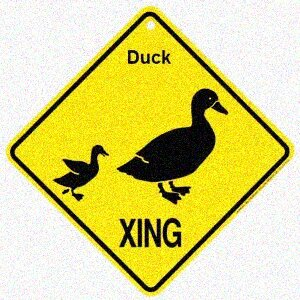

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 JPEG     300    300 sRGB       FALSE        0 72x72  

In [41]:
col_images %>%
 .[[1]] %>%
 image_noise()

More advanced filter allows us to visualize the edges of the image.

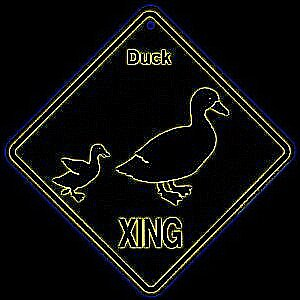

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 JPEG     300    300 sRGB       FALSE        0 72x72  

In [47]:
col_images %>%
 .[[1]] %>%
 image_edge()

The negative of the image

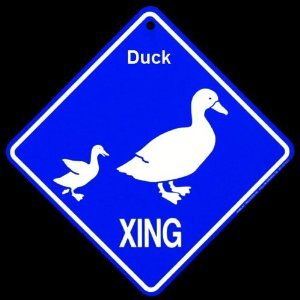

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 JPEG     300    300 sRGB       FALSE        0 72x72  

In [48]:
col_images %>%
 .[[1]] %>% image_negate()

**Your turn**

Try adding some blur to an image and then perform edge detection. What changes?

Try adding some noise to an image and then perform edge detection. What changes?

Try both blurring and noising the image.

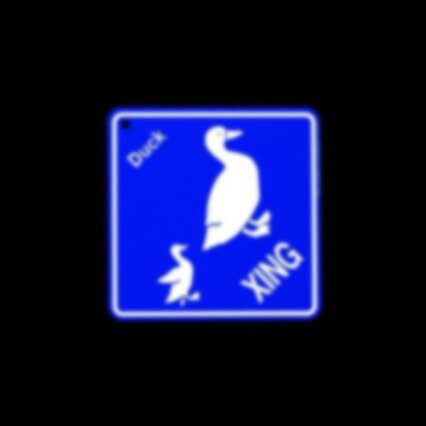

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 JPEG     426    426 sRGB       FALSE        0 72x72  

In [55]:
col_images[[1]] %>%
  image_rotate(-45) %>%
  image_blur(5, 2) %>%
  image_negate()

`magick` provides a lot of different processing algorithm. To discover them, the [introduction vignette to `magick`](https://cran.r-project.org/web/packages/magick/vignettes/intro.html) is a great place to start. Try some functionalities on your own (maybe from [here](https://cran.r-project.org/web/packages/magick/vignettes/intro.html#filters_and_effects) ).

### Color channels!

Before we have seen the the "colorspace" of our colored images is "sRGB". This stands for "standard Red Green Blue". It means that the image is given by the superposition of three color layers: a red, a green, and a blue one. Let's use our `forest_image` to explore colors.

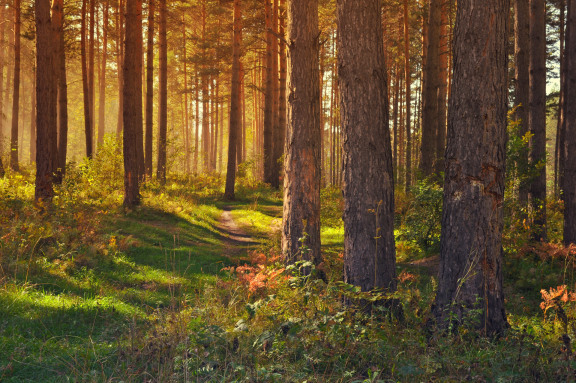

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 JPEG     576    383 sRGB       FALSE   138920 72x72  


In [57]:
forest <- forest_image %>%
  paste0(base_path, .) %>%
  image_read() %T>%
  print()

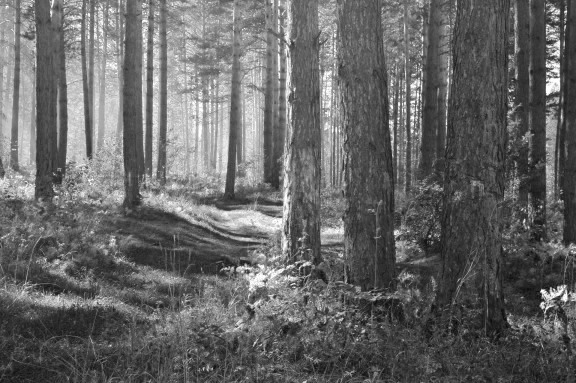

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 JPEG     576    383 Gray       FALSE        0 72x72  

In [58]:
# Filtering out the red channel
forest %>% image_channel(channel = "red")

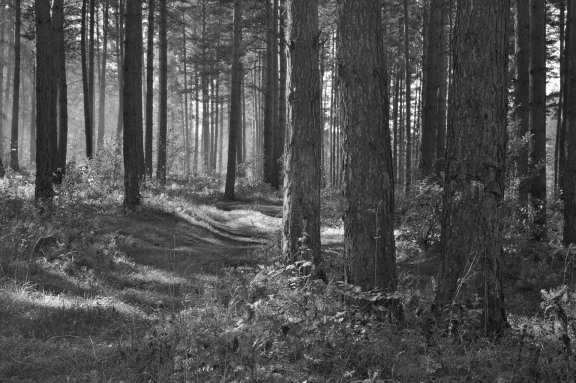

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 JPEG     576    383 Gray       FALSE        0 72x72  

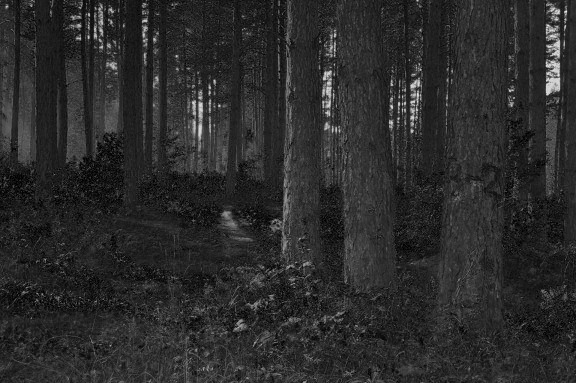

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 JPEG     576    383 Gray       FALSE        0 72x72  

In [60]:
### Write your own code to filter out the Green and the Blue channel
forest %>% image_channel(channel = "green")
forest %>% image_channel(channel = "blue")

A part from the three channel Red, Green, Blue, magick can extract (that is, compute and show) other special channels. For example the "lightness" of an image.

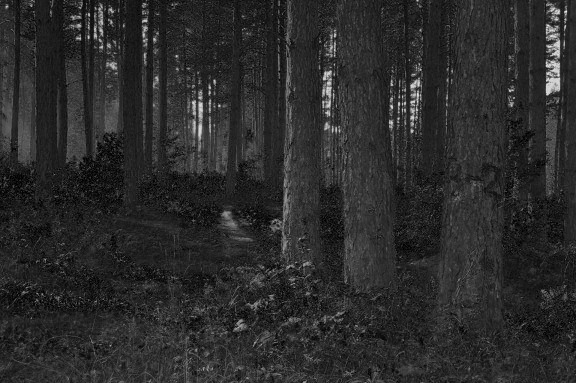

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 JPEG     576    383 Gray       FALSE        0 72x72  

In [61]:
forest %>%
  image_channel(channel = "lightness")

To see all the different possible channels, we can use `channel_types()`.

In [62]:
channel_types()

[1] "Undefined"     "A"             "All"           "Alpha"        
 [5] "AutoThreshold" "B"             "Black"         "Blue"         
 [9] "C"             "Chroma"        "Cyan"          "Default"      
[13] "G"             "Gray"          "Green"         "H"            
[17] "Hue"           "Index"         "K"             "L"            
[21] "Lightness"     "Luminance"     "Luminosity"    "Magenta"      
[25] "Matte"         "M"             "O"             "Opacity"      
[29] "Red"           "R"             "Saturation"    "S"            
[33] "Sync"          "Y"             "Yellow"        "0"            
[37] "1"             "2"             "3"             "4"            
[41] "5"

**your turn**

Try to extract various channels from the images we read in and (before or after extracting the channels) apply some processing algorithm.

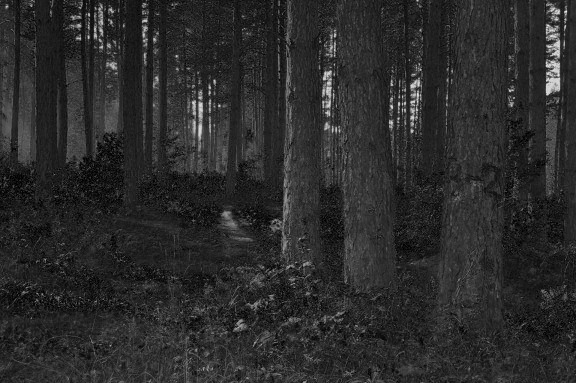

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 JPEG     576    383 Gray       FALSE        0 72x72  

In [70]:
forest %>% image_channel(channel = "All")

## Other Package in R - imageR

There are many other packages in R, we are also going to use Imager. This is one of the other commonly used image processing packages in R. We are going to plot the **boats** image included in the package.

For more information see:

https://dahtah.github.io/imager/

Installing package into 'C:/Users/Tommy/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)

also installing the dependencies 'bmp', 'tiff', 'png', 'jpeg', 'readbitmap', 'downloader', 'igraph'




package 'bmp' successfully unpacked and MD5 sums checked
package 'tiff' successfully unpacked and MD5 sums checked
package 'png' successfully unpacked and MD5 sums checked
package 'jpeg' successfully unpacked and MD5 sums checked
package 'readbitmap' successfully unpacked and MD5 sums checked
package 'downloader' successfully unpacked and MD5 sums checked
package 'igraph' successfully unpacked and MD5 sums checked
package 'imager' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Tommy\AppData\Local\Temp\RtmpQJG64p\downloaded_packages



Attaching package: 'imager'


The following object is masked from 'package:magrittr':

    add


The following object is masked from 'package:stringr':

    boundary


The following object is masked from 'package:tidyr':

    fill


The following objects are masked from 'package:stats':

    convolve, spectrum


The following object is masked from 'package:graphics':

    frame


The following object is masked from 'package:base':

    save.image




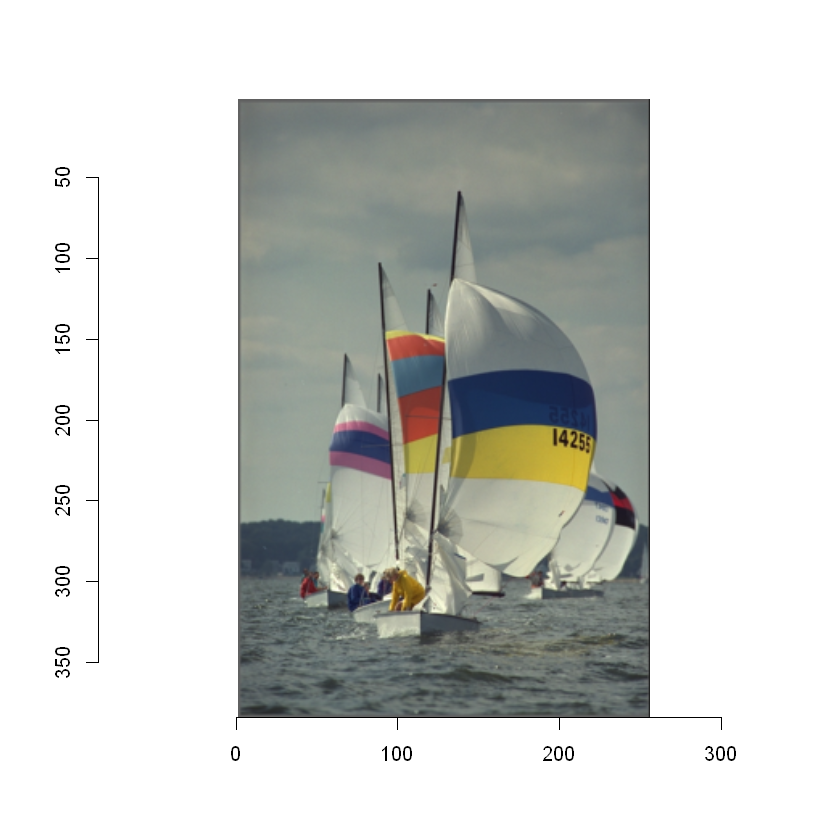

In [73]:
install.packages("imager")
library(imager)
boats %>% plot()

## Image as an array

We discussed in the lecture that an image is represented by an array. Here we illustrate this with the boat image.

We are going to change the **cimg** format to the **array** format.

In [74]:
boats_array_numbers <- as.array(boats)

In [75]:
boats_array_numbers %>% dim()

[1] 256 384   1   3

Check at pixel x = 180, y = 250 (this a pixel of the white sail of the sail boat, see above plot), for the RGB colour. Note that this has been normalized to between 0 to 1, rather then 0 to 255.

We can make this conversion to between 0 to 255 in interger as what we discussed in the lecture.

In [76]:
boats_array_numbers[180,250,1,]

[1] 0.7445513 0.7601056 0.6639235

In [77]:
as.integer(boats_array_numbers[180,250,1,]*255)

[1] 189 193 169

**your turn**

Try have a look at other pixels, and have a look at the RGB codes.

**Bonus**, see if you can turn it into hex code:

In [78]:
as.integer(boats_array_numbers[180,250,1,]*255)%>%
as.hexmode()

[1] "bd" "c1" "a9"

## Doing some computation in the image array

### Find the horizontal and vertical edges
Here we are going to use the local difference method to find the horizontal and vertical edges in the image. This means we are going to shift the original image either horizontally (or vertically) by 1 pixel in each direction, and then calculate the difference.

Then we are going to plot this difference.

In [79]:
boats_array_numbers[2:256,1:384,,,drop = F] %>% dim()

[1] 255 384   1   3

In [80]:
shifted_image <- boats_array_numbers[2:256,1:384,1,1:3,drop = F]

In [81]:
original_image <- boats_array_numbers[1:255,1:384,1,1:3,drop = F]

In [82]:
shifted_vect<- boats_array_numbers[2:5,1:1,1,1:1,drop = F]

In [83]:
original_vect <- boats_array_numbers[1:4,1:1,1,1:1,drop = F]

In [84]:
original_vect

, , 1, 1

          [,1]
[1,] 0.3882353
[2,] 0.3858633
[3,] 0.3849406
[4,] 0.3852481

In [85]:
shifted_vect

, , 1, 1

          [,1]
[1,] 0.3858633
[2,] 0.3849406
[3,] 0.3852481
[4,] 0.3860388

In [86]:
boats_array_hori_diff<-(shifted_image-original_image)/2

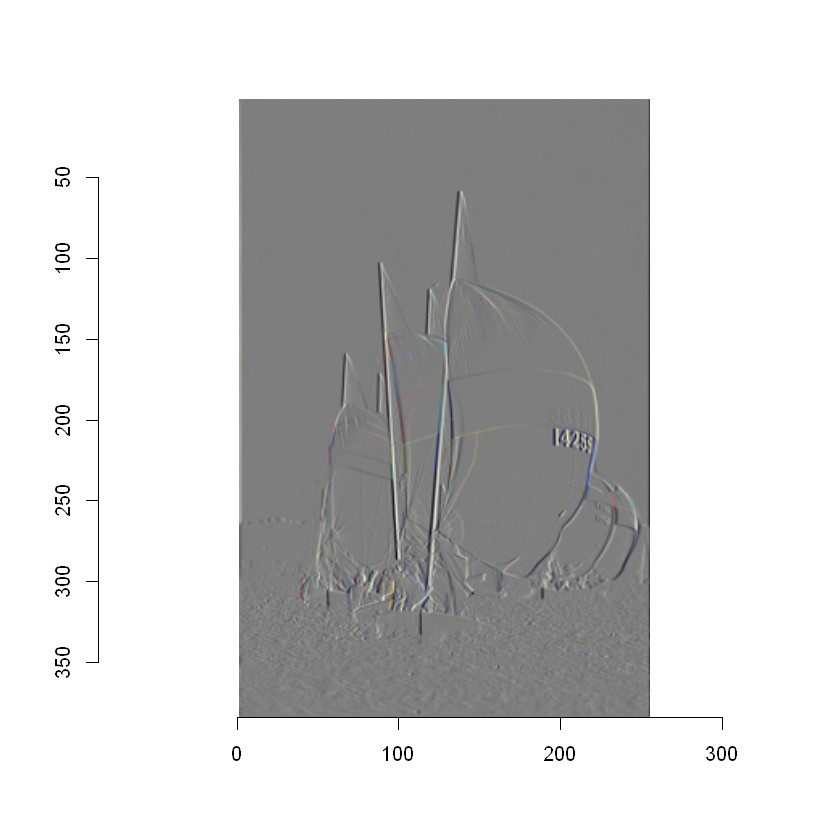

In [87]:
cimg(boats_array_hori_diff) %>% plot()

In [88]:
boats_array_vert_diff<-(boats_array_numbers[1:256,2:384,1,1:3,drop = F]-boats_array_numbers[1:256,1:383,1,1:3,drop = F])/2

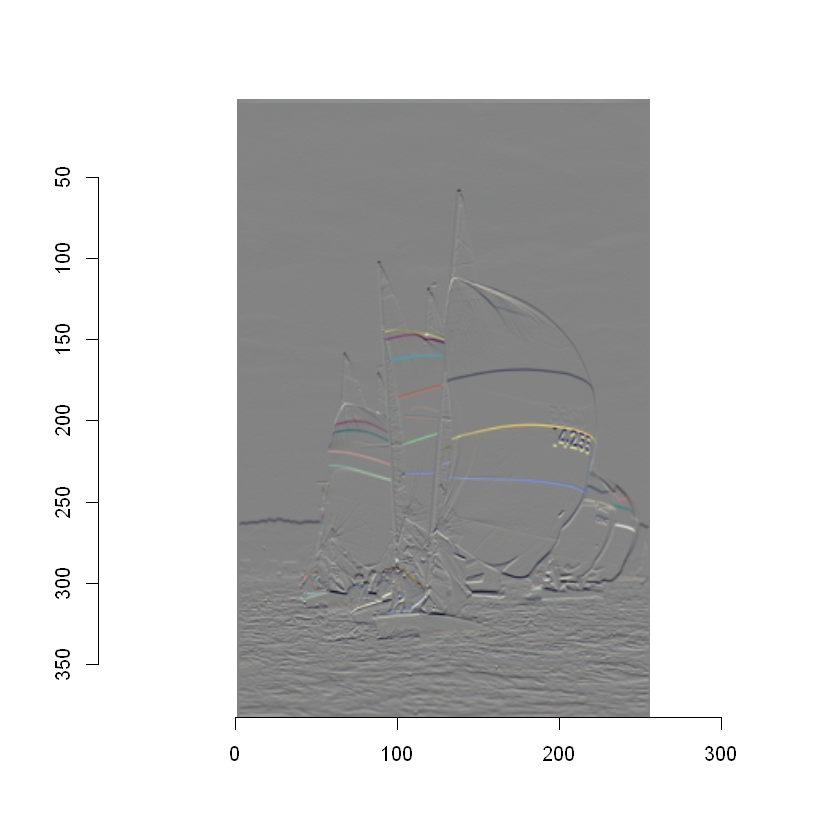

In [89]:
cimg(boats_array_vert_diff) %>% plot()

**Your turn**, try combine the horizontal and vertical difference signal to detector the overall different.

You are goinng to use the formula: Difference = (hori_Diff^2 + vert_Diff^2)^0.5, You have to clip out the image so that they are the same size:

In [90]:
dim(boats_array_vert_diff)
dim(boats_array_hori_diff)

[1] 256 383   1   3

[1] 255 384   1   3

In [91]:
Diff <- (boats_array_vert_diff[1:255,1:383,1,1:3,drop = F]^2 + boats_array_hori_diff[1:255,1:383,1,1:3,drop = F]^2)^0.5

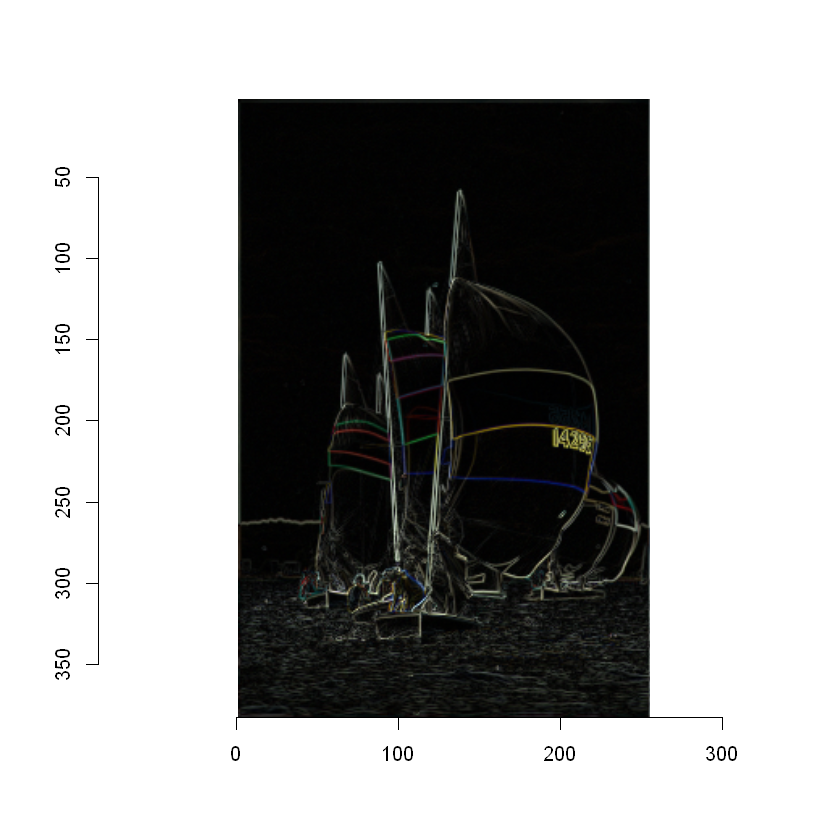

In [92]:
cimg(Diff) %>% plot()

### Negative Image
We can also compute the negative of an image.

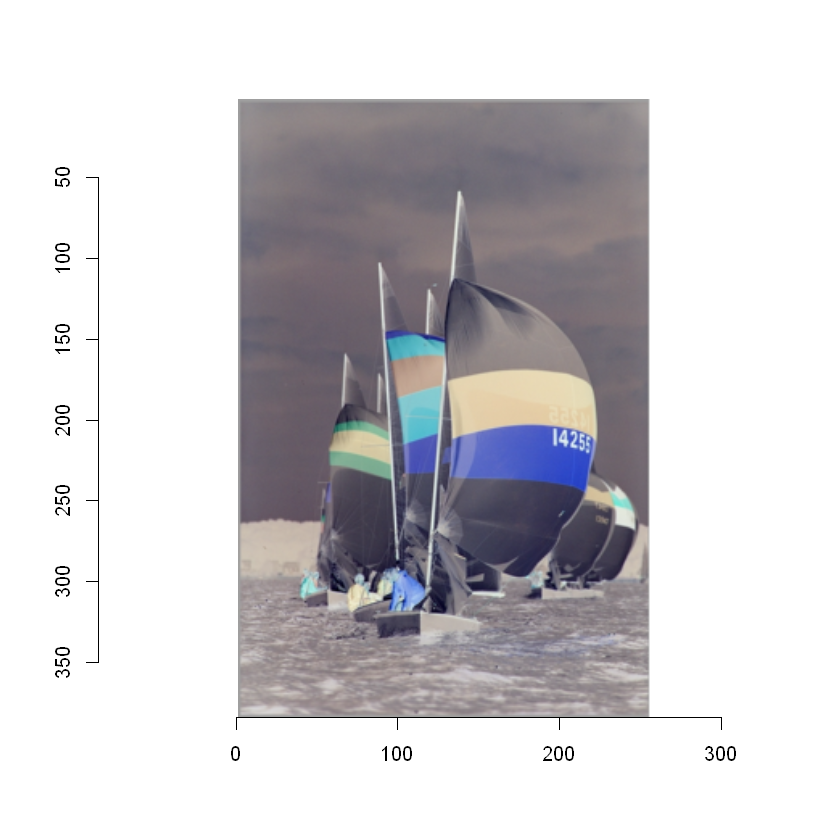

In [93]:
plot(cimg(1-boats_array_numbers))

### Change it's brightness and contrast

Here we are going to increase the brightness by 20%, using the formula **pixel_value * 1.2**, and then threshold it between 0 and 1.

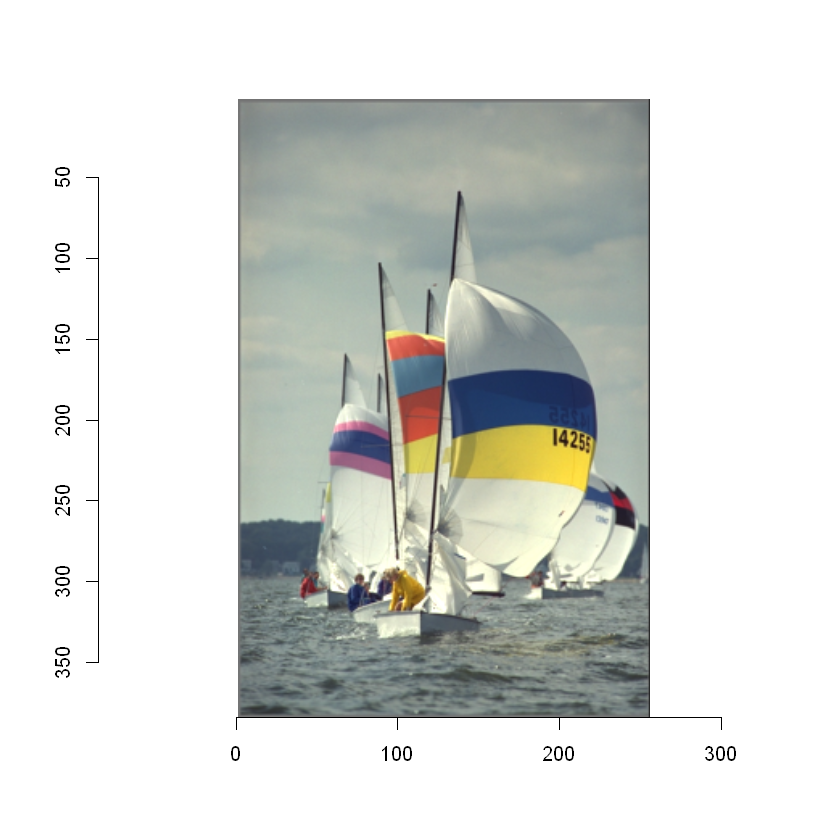

In [94]:
# Calculate the image with an increase in brigthness:
boats_array_brighter <- (boats_array_numbers*1.2)*(boats_array_numbers*1.2 <=1) + (boats_array_numbers*1.2 >1)
# Plot it out the image with increase brigthness:
boats_array_brighter %>% cimg() %>% plot()

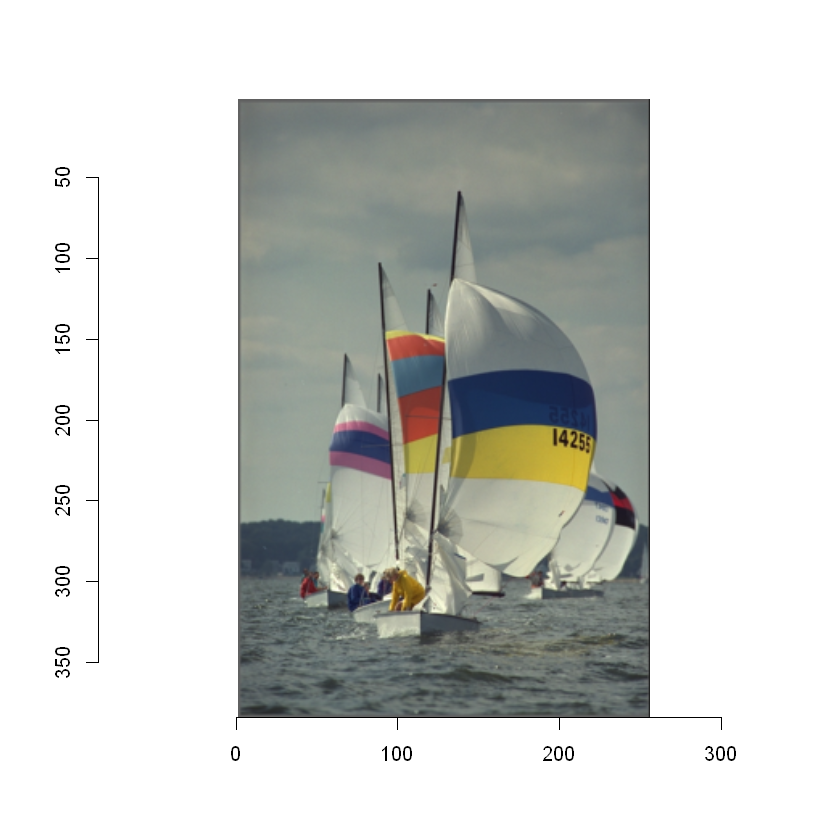

In [95]:
plot(cimg(boats_array_numbers))

**Your turn**

Here we are going to decrease the contrast by 50%, using the formula pixel_value/2+0.5.

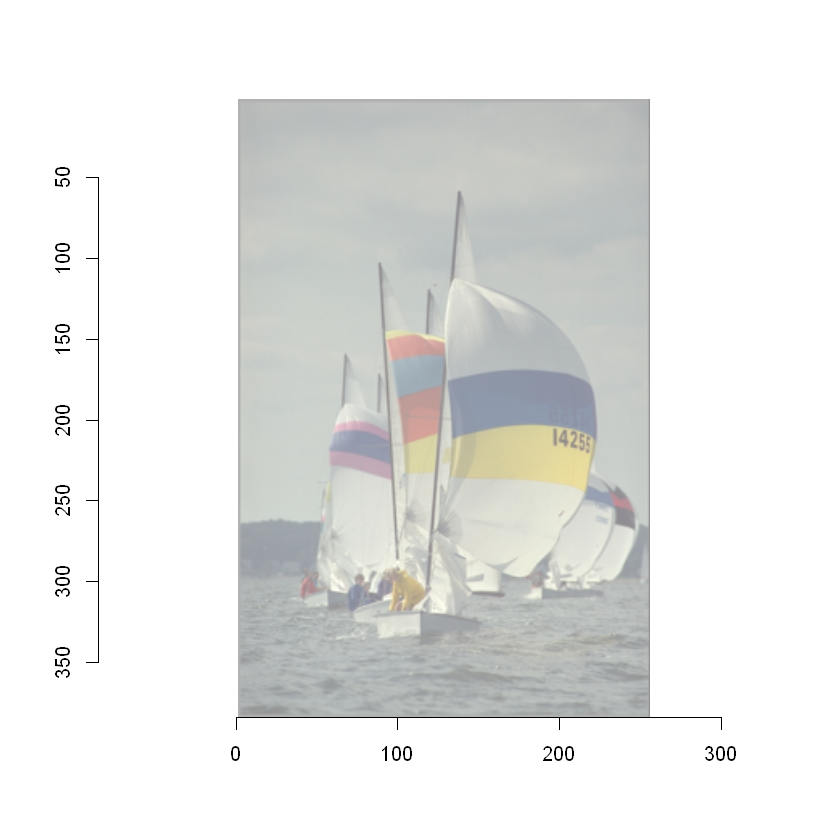

In [96]:
# Calculate the image with an increase in brigthness:
boats_array_2 <- boats_array_numbers/2+0.5
# Plot it out the image with increase brigthness:
boats_array_2 %>% cimg() %>% plot(., rescale = FALSE)

## Saving images

Saving images is similar to reading them (well, sort of, right?). `magick` provides the function `image_write()` that can handle the task.

It accepts different options (see `?image_write` for the details), but the basic ones are the `image` you want to save, the `path` where you want to save it, and its `format`.

As a general rule, it is always better to save source data in a separate folder than the data you wrangled (processed, modified, outputted). So, first of all, create a new folder called "output_images" in your working directory (you can do this via jupyterlab. Then, save some image there.

In [97]:
forest %>%
  image_blur(5,2) %>%
  image_write(path = "forest_blurred.png",
              format = "png")

Now, try to read it back and see that everything worked.

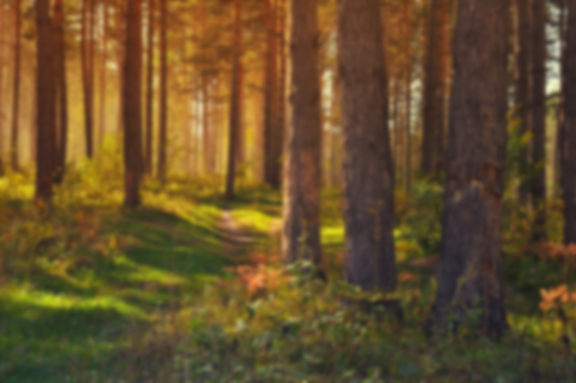

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      576    383 sRGB       FALSE   226362 28x28  

In [98]:
"forest_blurred.png" %>%
  image_read()

**your turn**

Using `purrr` and `magick` apply some processing to a list of images and save them all.

In [99]:
# your code goes here.

## Bonus

Some animation, we are just going to show a cool optical flow example. Where the image gradually changes from one image to another, in this case from the old R logo to the new R logo.

This part reproduce the morphing example from https://github.com/ropensci/magick

[1] "New Logo:"


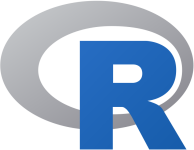

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      194    150 sRGB       TRUE         0 72x72  

[1] "Old Logo:"


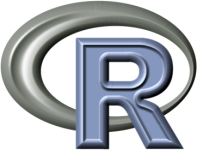

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      197    150 sRGB       TRUE         0 118x118

In [100]:
print("New Logo:")
image_scale(image_read("https://jeroen.github.io/images/Rlogo.png"), "x150")
print("Old Logo:")
image_scale(image_read("https://developer.r-project.org/Logo/Rlogo-3.png"), "x150")

In [101]:
newlogo <- image_scale(image_read("https://jeroen.github.io/images/Rlogo.png"), "x250")
oldlogo <- image_scale(image_read("https://developer.r-project.org/Logo/Rlogo-3.png"), "x250")
frames <- image_morph(c(oldlogo, newlogo), frames = 15)
image_animate(frames)

<img src="data:image/gif;base64,R0lGODlhSQH6APcAAAICAwgJDAwOFA4QFw8RGBMVEhYZFRIVHBodGRYaGxASDx0iHCAlHxkc
JBsfKBYZIR4iLB4gIyImISUpIyksJisuKSEkLi4xKzE1LiEmMSUpNCkuOigsNyswPS4xNTM3
MDY6Mzk9Njs/ODM1Oz5CO0FGPkJIPy0zQTA2RTQ5RTU8TDo+Rzg/UTxDVT9HWj9HWjxBTUVK
QklORkZJRU1SSktQR1FWTVNYT0FKXUVKVlVaUlleVVZZV01TW1pgV11jWmFmXmJoX0ROYkhP
YEtVa0pUaU5ZcVJcdFRfeFVbZ1Zhe1lkfVlhc1xgaGVqYmluZWRnaWtwZ21yanF2bXJ4b3V6
cnl+dnt/eHV4fGdteH6BenuAd4GFfVtngl1phV9siWFui2FshWRxjWp0iWZzkml2km15lm18
nXF+m3J9lXZ8hm9+oXB/oXSBnnuFmnuBi3ODo3mHpXWFqHuKrHuJpn2NsX+QtYOHgIaKg4mN
hoqPiISHjI6Ri5GVjoqMkoSLl5OXkJaak5mdlpufmJKVm4yQl52hm6GlnoGOq4qVr4WRrJmd
pIOStIyYtIWXvYaYvouauomWtZCevpSds4CPsJWiv5ukuZ2hqqOnoKWpo6mspquuqaOlqq2x
rLC0r7O2sba5tLu+ubi7t6SquL7BvMDDv42dwoeZwJCfwZSixJWlyZyqy5mnxp6u0o+gxaCr
xKGuzqCu0qSz1Ku63Ki22Ky516694bTD5L3M7LjH57vL7rXD3MPGwcbJxMvOysjLx87RzdDS
z9TV0tzd2tfZ1t/g3uDh38XT88jW9sza+MfV8Njn++Pk4+vs6+fo5+/w7uXz/vT09Pj4+Orw
9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACH5BAkKANQAIf8LTkVUU0NBUEUyLjADAQAAACwA
AAAASQH6AAAI/wCpCRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHi4H6aDEUKNAg
LVtKGjL0saXLlzBjypx5MQ8fPHnwcOGSZyeXK1asXNlZZcuPLUiTJn0iRWlRLXi0aOnJRQ/N
q1izat2qUU+er3h0StUStOyWKmjTVhFKVqnSKFG2PHmyJS6VKVTy5q2ilwpaLVwA78zDtbDh
w4gv4vGqU6yWK0mtKA1aBSjaK5bXDoXsVumTuEil9B19d4pp03pFV0E5Fk/i17Bj0+TDOOzO
x1y2YMa8hXXSx7ulCt291idKtyjjft7SlO8Wv2hH48VLRYr1Kdazm14bdIvs7+DDN//sw6en
nttjdV953Hv92Pfwt+TW/XO38eNIpXZOWjR6Wuh76XWaFNhlZ6B1W0yhlHgMNmhYSF7xFNiE
Ut3m04QWChYYYBpqeOFQXDimX2/HNbWfW/2pxRdffRFYoBRRZDfXdXIVxYWDOOb4UXm2Xeij
jx7+eOEdOxHp0x1BDhbVe3nAF9+I+6VohYp8nWYajUE44cRcdBkVxII6hilmQ4Hc1KOQaO70
xk46sdmYTnfEGScectZpJBd34CRSk01qwYeTgbD23nz7TTkllXlNUYVpTiAVxJdzHRWEDzts
8eVqro2paZiC9KFHm2mm+aZtYZVqalhy4hTnV3nmlOpXIon/pIWsgTqZJIXwYVYWZVQuuoWW
js61hQ+N/hDEDXJ91pQWmzYLHiCA5BQqqFysed6npmKLU6k54dSttzl9lccdYIUblrhvyCrS
n/DVimeeaHYo1W67UnZol1si9cSXkiJ1g5YAP4GXd84WzBUgPN554Rtz0hlVuaVia+5i234q
LrjiZnxxueLqoUWggcYK8scfB2IqVGuGuuG869UrmVyWxuwoUj4gFcUTAOccBRUEG+zzSwh/
Ve278JLKrbfb5vSpVxl7pcfSeTCt8dRTSx01HyGTLCvJ7217Kptgp/kevSda+mXNW9wA481z
OfGo25/59fPcGvFBnp2pcstTt1RH/+2030/T9vTgTutR3tV+C+4VH7TR1rHdJI9cklRvRA7W
uWGdd6qcob6335dJoc2cgTfn/GiWAldB9+oQIcwjnQ2bynHVUQNO+OBXK06bp4z37vvvwPfe
ByAlhdxHH5IL8vHeGoPrNaqlhhhv2aArNaB1cHHpdhDGAuFEjKqzLr5B5IkrPVVC9/0V0+UZ
njjjhgd/PBd90D8/8juVxAUf0Np9PP+A+B/yAiGIQKRrfoEITP24IIjAIK52GUPa80qFpKpI
5Tz3cVJnWFSaKcDlg1p62w+8tyUphG98dBPE4WzTk6ZR7WmAY5xNgkfDAPqvU506XgFLUsAd
Eq94QAzJD/8N0cMdqkQlhngDSY5HHvIozn3Nuxwe+BCYp91qZVBCilo6iJ0PRsFtABshELwn
GhT6DGHaSlq41rc429GQf8LjXxOPF0CEQWuABNyhIPaYxx2SJIiBMMQPVcJHQBqyeNAK4PCC
R7UpGscnW6sQ/dLjlP+w6EprK50TxvgDMWpJCjcy45jKx601agx3jauh3RjXvzsmknjE2yMR
9yiIQQyClnzEpREPGcQe8vKXQXwlE3sHw/31IV1vqJXh/ERFLCoFJUG5wn9Skx1NhrGTI3SC
FKwgShwNog8Qw9j6YvhGOAJQkXQc3gAFMUtD2HIlt8QlIPEoCGgFYpC81CMti5f/S33+0oiw
RCd5YGiTWc2qilqoHHwmtBvMqChR1WRbzrDpg05G4YTdlE2nLiZONhruo//rnQ3lqM7h3bOA
RFyJSlW6x4Ay8aXIY2LxuGDPgALTiIUkoE6BaMSVHLGQfwTELmHqPwUe1IC1SqCHdFNJDr5I
otf8QUV/8ARuZvQ1ELJaxxYnPD14CqaLdOU9hweIlbBzpSmt4yppWJKXhmSHZLUpIHfZS10W
MY+B/CNJiLhTkujSkDHlQkgAE0kOBYlEkZlmdaqJs6h2sqLavKphjlcbU34UeMMEKx0HidaV
8tGJjqOaMfNnPyYKdoCJvGc+ecjaXOrUn/nMqR5fS9cg/+qwZJETEoeaGp0CZa+xWsImNrck
2axQlmIuDNzvNBtXIK70EIdYqRAddyY8OcxbjAOt3RLYwFviD5j83Kkvx8tDX4ZXvDsNpHrX
q9M/njckxwxMreiEJyBRkldV6mL2rgmEx0L2CcWVyT159LfBZdd/c3zpK4UqS5VCF7o+JU+b
nDSkPJ2rmfHbbk6RV9sgDoK1fSxgPGf7XkTe85UnNqk6V1tIEWPCEAzUQm1gV19nluU/eMEe
VDkpVR9AVgoBbkmnaLMYj2Z4lcwtiT0J+OBMYOLBK5HwhvjTHcxUKHZfoWKC8SdYno53j7f8
cJhtWctb/hKPxwuJ7z46OHDaJP9xTvxfHtTbB772YRCZMDMPh/mtCnZINzf+D2PbxmMf72AH
P4hskDcSNI/uDsmaXTI9H6yJQ2giEz4tT2CQwjMWoaUsknzXubKMYDoS0L19tOU7B9FZVYu4
eC+FX5PWNBXDxmssCq0QrllTLanIaieD6LIgMAFryoKFczbGL1+wp73g9phSiHYCFRYNEmLm
znfMVWRI+GkI6Gri25c+RJl0wum7lEYva8mPhiw8zuw2N4/PNcSTo0tvtBoRppvG9YnwY6h6
7Xs/WczPfHCNR0TK0FX23dUWZdTY/lJ0BzqINrUn8s0nHrnUCjZpebt9iE1sohObqHSnNs1F
Kw2sKEH/kSS74azxWjr4yZiIucxlDmFVm4SJlSMRfvSDn6W4Bd0rIg11QsOcsqn76Ftolf/6
6Dpp2Rcoh3KqdYC7yR4f+tBAiM

# A tibble: 17 × 7
   format width height colorspace matte filesize density
   <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
 1 gif      329    250 sRGB       TRUE         0 118x118
 2 gif      329    250 sRGB       TRUE         0 118x118
 3 gif      329    250 sRGB       TRUE         0 118x118
 4 gif      329    250 sRGB       TRUE         0 118x118
 5 gif      329    250 sRGB       TRUE         0 118x118
 6 gif      329    250 sRGB       TRUE         0 118x118
 7 gif      329    250 sRGB       TRUE         0 118x118
 8 gif      329    250 sRGB       TRUE         0 118x118
 9 gif      329    250 sRGB       TRUE         0 118x118
10 gif      329    250 sRGB       TRUE         0 118x118
11 gif      329    250 sRGB       TRUE         0 118x118
12 gif      329    250 sRGB       TRUE         0 118x118
13 gif      329    250 sRGB       TRUE         0 118x118
14 gif      329    250 sRGB       TRUE         0 118x118
15 gif      329    250 sRGB       TRUE         0 118x118
16 gif      

### Write some code that morph one traffic sign to another.

**Your turn** to have a practise:

Also have a look at the other **two images**.

## JPEG Compression
There are many format to save your images, and you can compress your images to save storage, we will use the boat example to save at 100%, 90%, 10% and 1% JPEG image fidelity

In [102]:
forest%>%
image_write( "forest100.jpeg",quality=100)

In [103]:
forest%>%
image_write( "forest90.jpeg",quality=90)

In [104]:
forest%>%
image_write( "forest10.jpeg",quality=10)

In [105]:
forest%>%
image_write( "forest1.jpeg",quality=1)

In [106]:
forest%>%
image_write( "forest75.jpeg",quality=75)

## Select a random face in a photograph
bonus contents

In [107]:
install.packages("image.libfacedetection", repos = "https://bnosac.github.io/drat")
library(image.libfacedetection)

Installing package into 'C:/Users/Tommy/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)

Warning message:
"unable to access index for repository https://bnosac.github.io/drat/bin/windows/contrib/4.2:
  cannot open URL 'https://bnosac.github.io/drat/bin/windows/contrib/4.2/PACKAGES'"
Package which is only available in source form, and may need
  compilation of C/C++/Fortran: 'image.libfacedetection'

installing the source package 'image.libfacedetection'




Read in the image, and then detect all the faces in that image

In [ ]:
image <- image_read("processed.jpeg")
faces <- image_detect_faces(image)

Plot out all the detected faces

In [ ]:
faces$detections <- faces$detections %>% filter(confidence>95)
plot(faces, image, border = "red", lwd = 7, col = "white")

In [ ]:
faces_draw=faces
faces_draw$detections = faces$detections[sample(faces$nr,1),]

In [ ]:
plot(faces_draw, image, border = "red", lwd = 7, col = "white")